**Author:** VENKAT RAMANAN R

**Project Type:** Regression ML Project

**Project Title:** Vehicle Price Prediction using Machine Learning

**Problem Statement:**
The price of a used vehicle depends on multiple factors such as manufacturing year, kilometers driven, fuel type, transmission, ownership history, and seller type. Manually estimating the correct selling price is difficult and often inaccurate.

The objective of this project is to build a Machine Learning model that can predict the selling price of a vehicle based on its features. This helps sellers set competitive prices and helps buyers understand the fair market value of a car.

**Dataset Information:**
The dataset contains historical records of used vehicles along with their specifications and selling prices. Each row represents one vehicle listing.

**Columns Description:**

* **name:** Name/model of the car (text feature; not useful for prediction and can be removed during preprocessing).
* **year:** Year in which the vehicle was manufactured. This helps determine how old the car is.
* **selling_price:** The price at which the vehicle was sold. This is the target variable the model will predict.
* **km_driven:** Total distance driven by the vehicle in kilometers. Higher mileage generally reduces the price.
* **fuel:** Type of fuel used by the vehicle (Petrol, Diesel, CNG, etc.).
* **seller_type:** Whether the car is sold by a Dealer or an Individual.
* **transmission:** Type of transmission (Manual or Automatic).
* **owner:** Ownership status of the car (First owner, Second owner, etc.), indicating how many times the vehicle has changed hands.

**Goal:**
Use the input features (year, km_driven, fuel, seller_type, transmission, owner) to train a regression model that can accurately predict the selling_price of a vehicle.


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [132]:
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [134]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [135]:
df.duplicated().sum()

np.int64(763)

The dataset contained duplicate entries which could bias the model. These duplicates were removed to ensure better training quality and generalization.

In [136]:
df=df.drop_duplicates()

In [137]:
df.duplicated().sum()

np.int64(0)

In [138]:
col=list(df.columns)
col

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

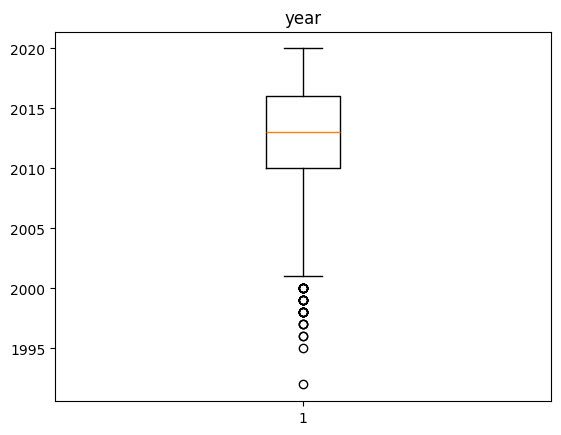

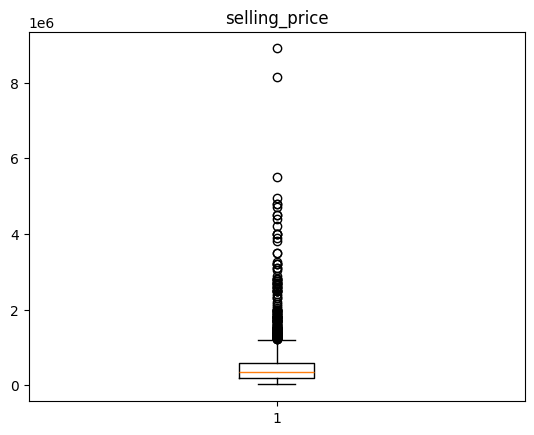

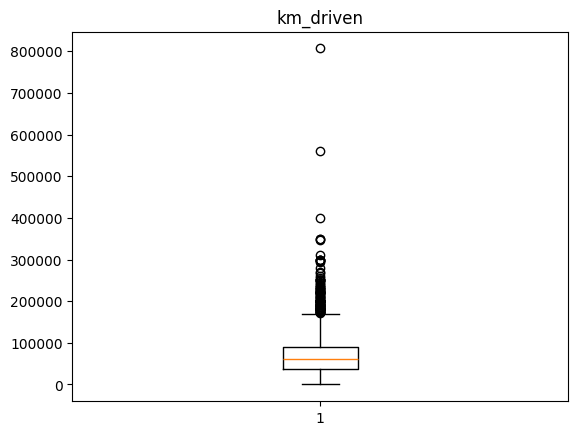

In [139]:
for i in col:
  if(df[i].dtype!="object"):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [140]:
for i in col:
  if(df[i].dtype!="object"):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[i]>=lower_bound)&(df[i]<=upper_bound)]

In [141]:
df.shape

(3250, 8)

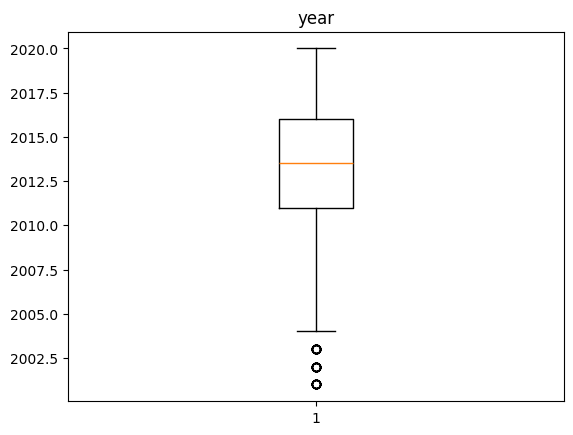

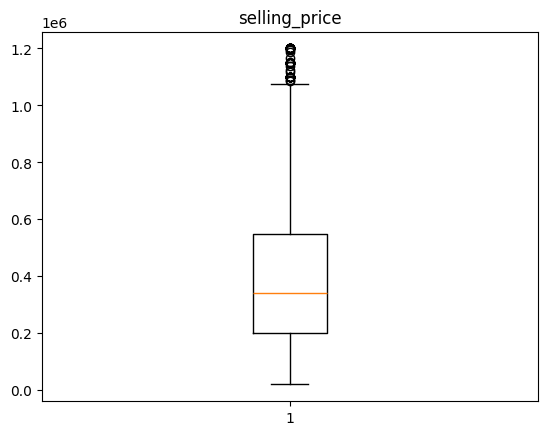

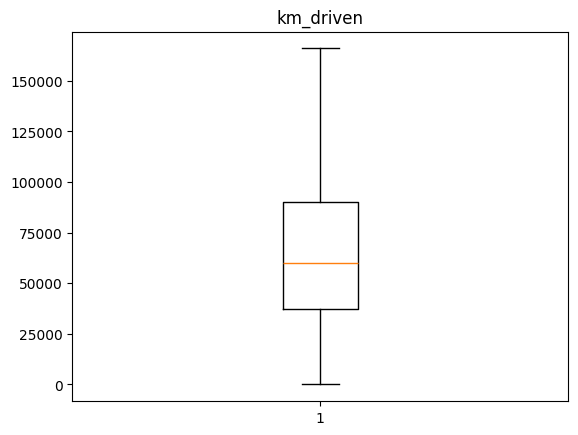

In [142]:
for i in col:
  if(df[i].dtype !='object'):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [144]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

In [145]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [146]:
df=df.drop("name",axis=1)

In [147]:
col1=list(df.columns)

In [148]:
col1

['year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'brand']

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [150]:
for i in col1:
  if(df[i].dtype=="object"):
    df[i]=le.fit_transform(df[i])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           3250 non-null   int64
 1   selling_price  3250 non-null   int64
 2   km_driven      3250 non-null   int64
 3   fuel           3250 non-null   int64
 4   seller_type    3250 non-null   int64
 5   transmission   3250 non-null   int64
 6   owner          3250 non-null   int64
 7   brand          3250 non-null   int64
dtypes: int64(8)
memory usage: 228.5 KB


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [153]:
x=df.drop(columns=["selling_price"])
y=df["selling_price"]

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=45)

In [156]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [157]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [158]:
model=LinearRegression()

In [159]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [160]:
y_pred=model.predict(x_test_scaled)

In [161]:
result=pd.DataFrame(columns=["Actual Value","Predicted Value"])
result["Actual Value"]=y_test
result["Predicted Value"]=y_pred

In [162]:
result

,Actual Value,Predicted Value
3716,495000,601578.889377
3480,300000,361721.431533
3076,420000,406854.884102
4285,100000,-7764.272929
1832,35000,255025.693256
...,...,...
739,229999,450310.548966
1554,110000,167715.718858
3457,58000,122987.076206
1673,850000,639102.331653


In [163]:
from sklearn.metrics import *

In [164]:
r2=r2_score(y_test,y_pred)

In [165]:
mae=mean_absolute_error(y_test,y_pred)

In [166]:
mse=mean_squared_error(y_test,y_pred)

In [167]:
overall={"R2 Score":r2,"MAE":mae,"MSE":mse}
overall

{'R2 Score': 0.5378174857910474,
 'MAE': 128827.81073333912,
 'MSE': 28483919669.426334}

In [168]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
count,3250.000000,3.250000e+03,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000,3250.000000
mean,2013.053846,3.959742e+05,64819.204308,2.528923,0.814462,0.940923,0.900308,11.964615
std,3.994594,2.524738e+05,36017.672687,1.510788,0.411859,0.235805,1.265799,4.203757
min,2001.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.000000e+05,37245.750000,1.000000,1.000000,1.000000,0.000000,10.000000
50%,2013.500000,3.400000e+05,60000.000000,4.000000,1.000000,1.000000,0.000000,12.000000
75%,2016.000000,5.500000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000,12.000000
max,2020.000000,1.200000e+06,166000.000000,4.000000,2.000000,1.000000,4.000000,21.000000


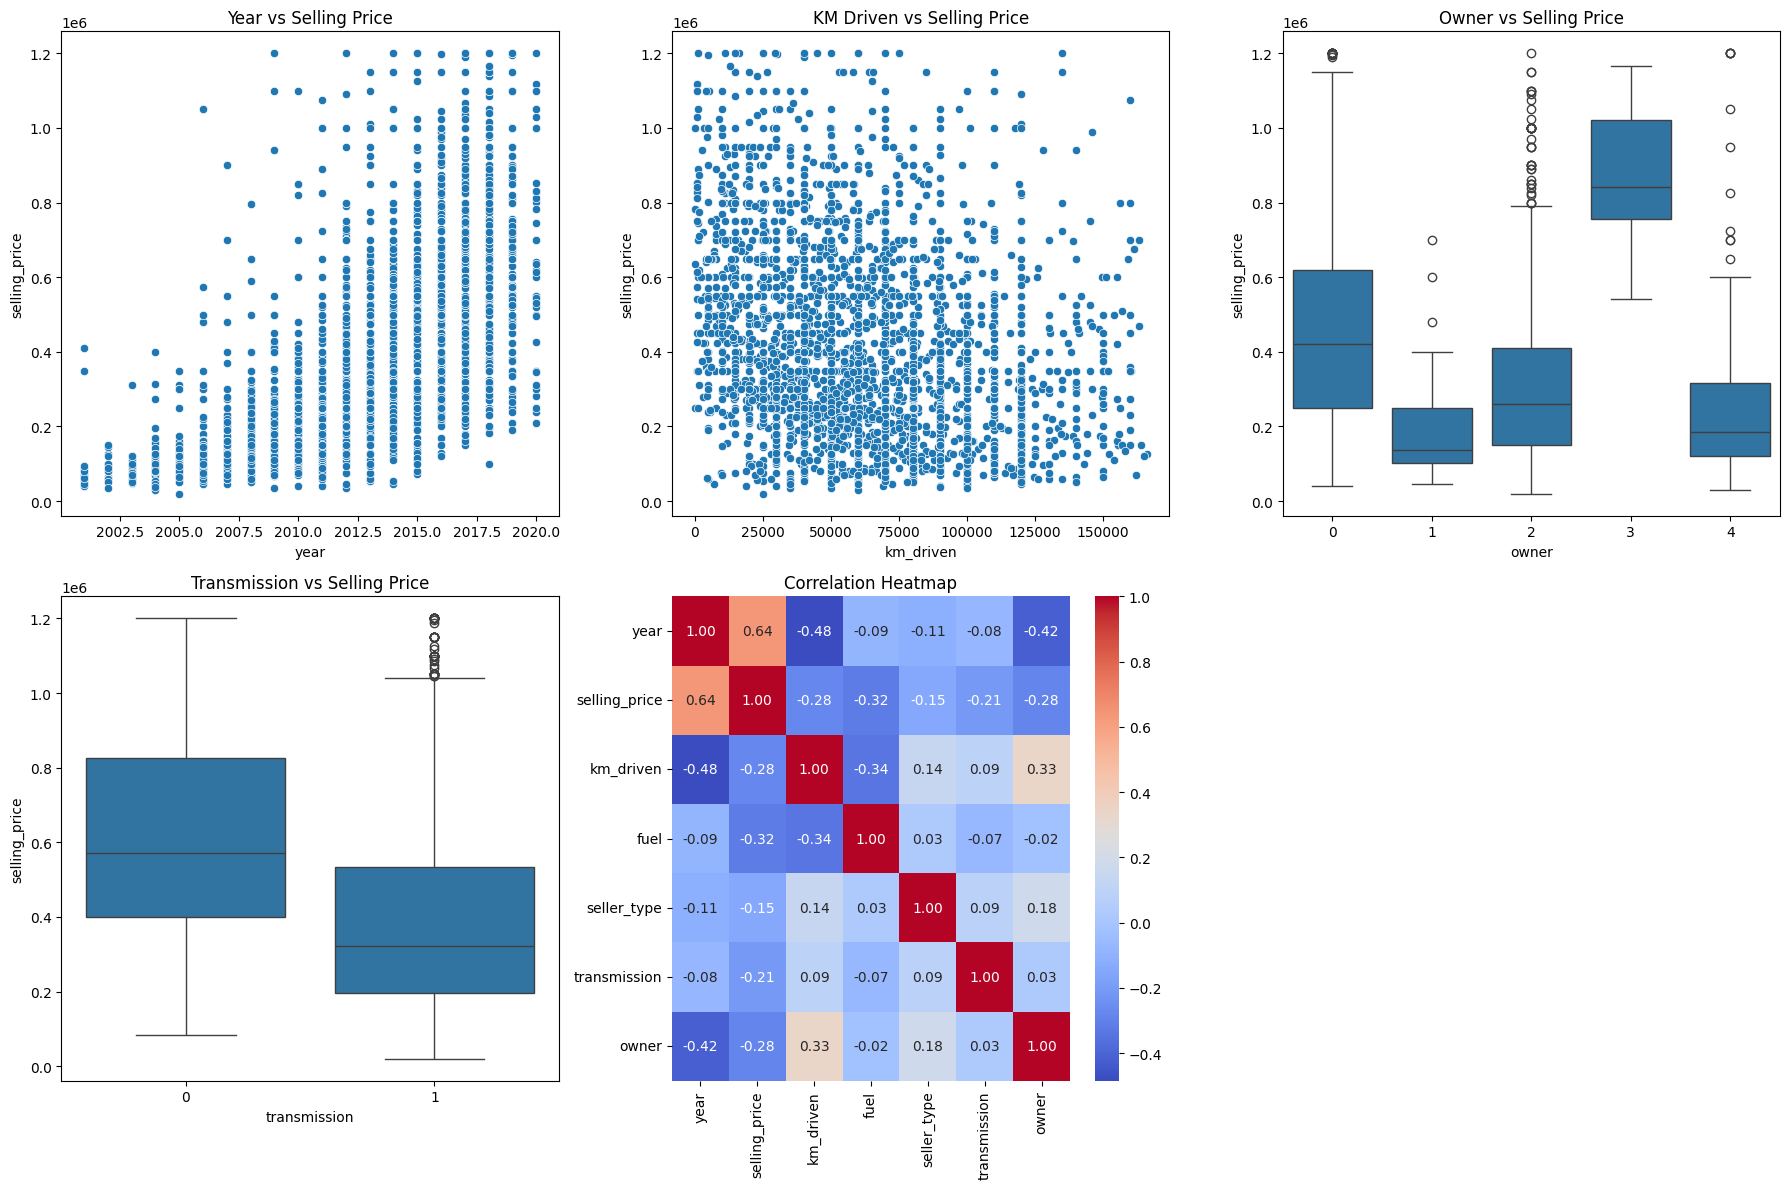

In [86]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Year vs Selling Price")

plt.subplot(2,3,2)
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title("KM Driven vs Selling Price")

plt.subplot(2,3,3)
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title("Owner vs Selling Price")

plt.subplot(2,3,4)
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title("Transmission vs Selling Price")

plt.subplot(2,3,5)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


Random Forest

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
model2=RandomForestRegressor(n_estimators=300,max_depth=15,random_state=42)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

In [171]:
y_pred2=model2.predict(x_test)

In [172]:
r2_2=r2_score(y_test,y_pred2)
mse_2=mean_squared_error(y_test,y_pred2)
mae_2=mean_absolute_error(y_test,y_pred2)

overall={"R2 Score":r2_2,"MAE":mae_2,"MSE":mse_2}
overall

{'R2 Score': 0.6593896123667586,
 'MAE': 104622.0244353977,
 'MSE': 20991531746.982483}

Decision Tree

In [173]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()

In [174]:
model3.fit(x_train,y_train)

DecisionTreeRegressor()

In [175]:
y_pred3=model3.predict(x_test)

In [176]:
r2_3=r2_score(y_test,y_pred3)
mse_3=mean_squared_error(y_test,y_pred3)
mae_3=mean_absolute_error(y_test,y_pred3)

overall={"R2 Score":r2_3,"MAE":mae_3,"MSE":mse_3}
overall

{'R2 Score': 0.4512258136051307,
 'MAE': 130482.18374358975,
 'MSE': 33820491605.312813}

**Conclusion**

Three different regression models — Linear Regression, Decision Tree, and Random Forest — were trained and evaluated to predict vehicle selling prices. Each model showed varying levels of performance, highlighting how different algorithms handle data patterns.

Linear Regression achieved a moderate R² score, indicating that it was able to capture general trends between features such as year, kilometers driven, and selling price. Its performance suggests that some relationships in the dataset follow a linear pattern. The model also maintained relatively stable error values, making it simple and interpretable.

Decision Tree showed lower performance compared to the other models. This is likely due to its tendency to overfit the training data and its sensitivity to small variations in the dataset. A single tree may not generalize well when the relationship between features and the target variable is complex.

Random Forest provided the best overall performance among the three models, achieving the highest R² score and the lowest prediction error. Since it is an ensemble of multiple decision trees, it is better at capturing complex and non-linear relationships while reducing overfitting. This indicates that vehicle pricing is influenced by multiple interacting factors rather than a single straight-line relationship.

From this comparison, we can conclude that while Linear Regression is effective for identifying general trends, ensemble-based models like Random Forest are more suitable for real-world prediction tasks where relationships between variables are complex. The results show that using multiple models and comparing their performance is essential to identify the most reliable approach for accurate prediction.
